In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


In [3]:
data=pd.read_csv('UniversalBank.csv')
data=data.drop(['ID','ZIP Code'],axis=1)
y=data['CreditCard']
data

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,0,1,0


In [4]:
data.isnull().sum()


Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

<Axes: title={'center': 'Heat map for data '}>

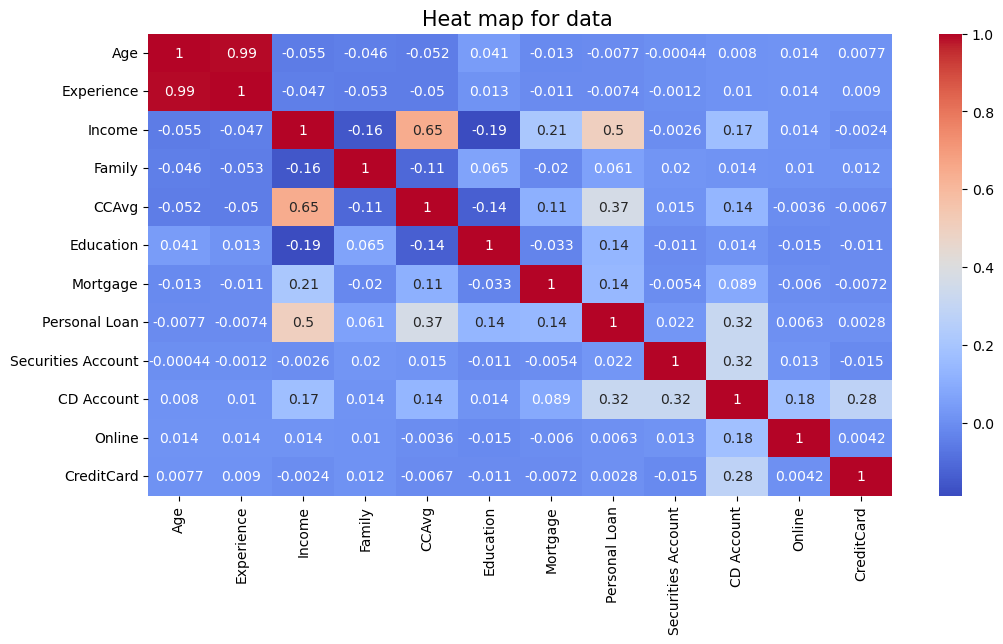

In [5]:
plt.figure(figsize=(12,6)) # w,h inche 
plt.title('Heat map for data ',fontsize=15) # title with font size 15 
sns.heatmap(data.corr(),annot=True , cmap='coolwarm')# annot=> numbers ,cmap=> color  

# zeros : 3530
# ones : 1470


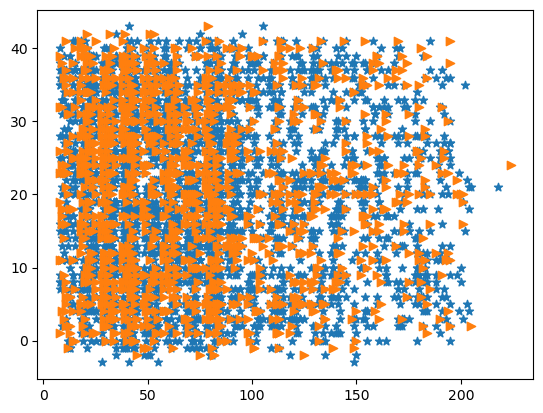

In [6]:
zeros_class=data[data['CreditCard']==0]
ones_class=data[data['CreditCard']==1]
plt.scatter(zeros_class['Income'],zeros_class['Experience'],marker='*')
plt.scatter(ones_class['Income'],ones_class['Experience'],marker='>')
print('# zeros :',len(zeros_class))
print('# ones :',len(ones_class))

In [7]:
from sklearn.preprocessing import StandardScaler 


scaler=StandardScaler()
scaled_data=scaler.fit_transform(data)
df=pd.DataFrame(scaled_data, columns=data.columns[:])
x=df.drop('CreditCard',axis=1)

x.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online
0,-1.774417,-1.666078,-0.538229,1.397414,-0.193385,-1.049078,-0.555524,-0.325875,2.928915,-0.25354,-1.216618
1,-0.029524,-0.096330,-0.864109,0.525991,-0.250611,-1.049078,-0.555524,-0.325875,2.928915,-0.25354,-1.216618
2,-0.552992,-0.445163,-1.363793,-1.216855,-0.536736,-1.049078,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618
3,-0.901970,-0.968413,0.569765,-1.216855,0.436091,0.141703,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618
4,-0.901970,-1.055621,-0.625130,1.397414,-0.536736,0.141703,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618


In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10,test_size=0.3)
y_train

2573    1
2066    1
2823    0
2389    1
2702    0
       ..
1180    1
3441    1
1344    0
4623    0
1289    0
Name: CreditCard, Length: 3500, dtype: int64

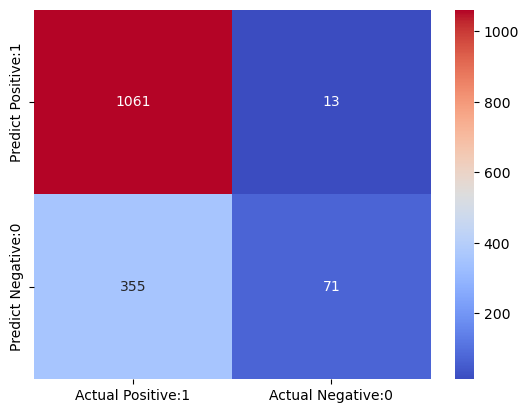

In [16]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix ,recall_score , precision_score

svc=SVC(kernel='rbf').fit(x_train , y_train)

predections =svc.predict(x_test)
cm=confusion_matrix(y_test,predections)
conf_matrix=pd.DataFrame(data=cm ,columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm')
plt.show()


In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predections))

              precision    recall  f1-score   support

           0       0.75      0.99      0.85      1074
           1       0.85      0.17      0.28       426

    accuracy                           0.75      1500
   macro avg       0.80      0.58      0.57      1500
weighted avg       0.78      0.75      0.69      1500

